In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('boston_data.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


The dataset (Boston Housing Price) was taken from the StatLib library which is maintained at Carnegie Mellon University and is freely available for download from the UCI Machine Learning Repository. The dataset consists of 506 observations of 14 attributes. The median value of house price in $1000s, denoted by MEDV, is the outcome or the dependent variable in our model. Below is a brief description of each feature and the outcome in our dataset:

    CRIM – per capita crime rate by town
    ZN – proportion of residential land zoned for lots over 25,000 sq.ft
    INDUS – proportion of non-retail business acres per town
    CHAS – Charles River dummy variable (1 if tract bounds river; else 0)
    NOX – nitric oxides concentration (parts per 10 million)
    RM – average number of rooms per dwelling
    AGE – proportion of owner-occupied units built prior to 1940
    DIS – weighted distances to five Boston employment centres
    RAD – index of accessibility to radial highways
    TAX – full-value property-tax rate per $10,000
PTRATIO – pupil-teacher ratio by town
BLACK – 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT – % lower status of the population
MEDV – Median value of owner-occupied homes in $1000’s


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [73]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [131]:
def distribusi(datakolom):
    fig, (ax1,ax2,ax3)= plt.subplots(3,figsize=(15,12))
    ax1.plot(datakolom)
    ax2.hist(datakolom)
    ax3.boxplot(datakolom,vert=False)
    print('Skewnessnya adalah ',datakolom.skew())
    q1, q3= np.percentile(datakolom,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    print('Outlier saat data diatas '+str(upper_bound)+' dan dibawah '+str(lower_bound))

Skewnessnya adalah  0.3300781778785762
Outlier saat data diatas 7.718999999999999 dan dibawah 4.813000000000001


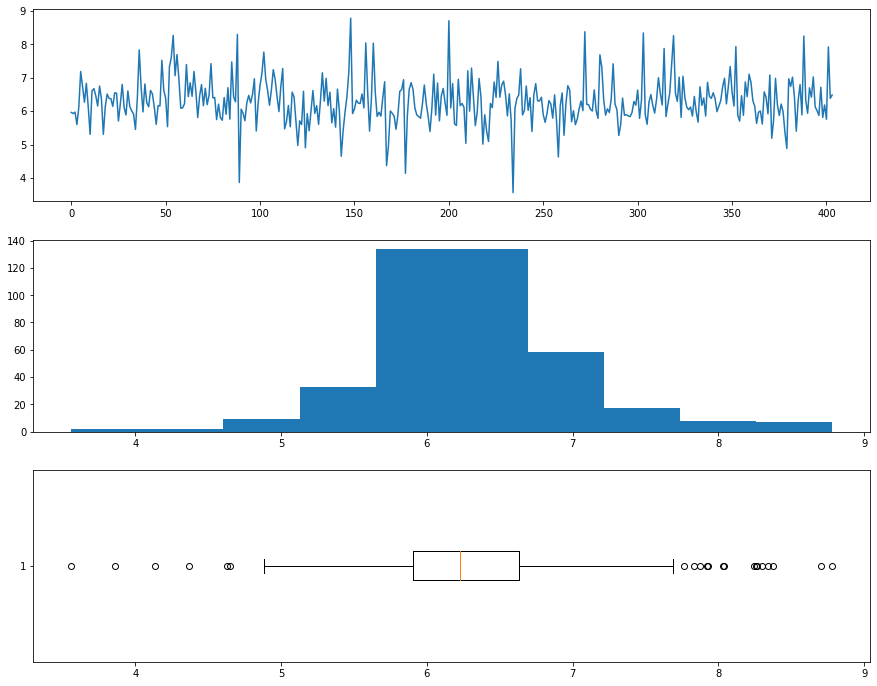

In [132]:
distribusi(data['rm'])

Skewnessnya adalah  0.8172334398957148
Outlier saat data diatas 31.5725 dan dibawah -7.527500000000002


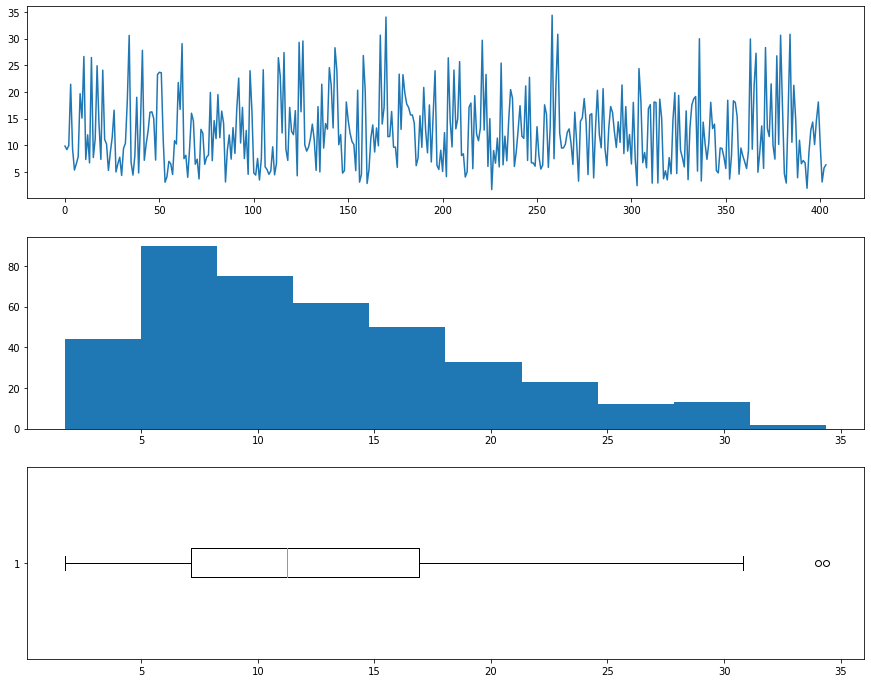

In [133]:
distribusi(data['lstat'])

Skewnessnya adalah  -0.8259671343294964
Outlier saat data diatas 24.4375 dan dibawah 13.137500000000001


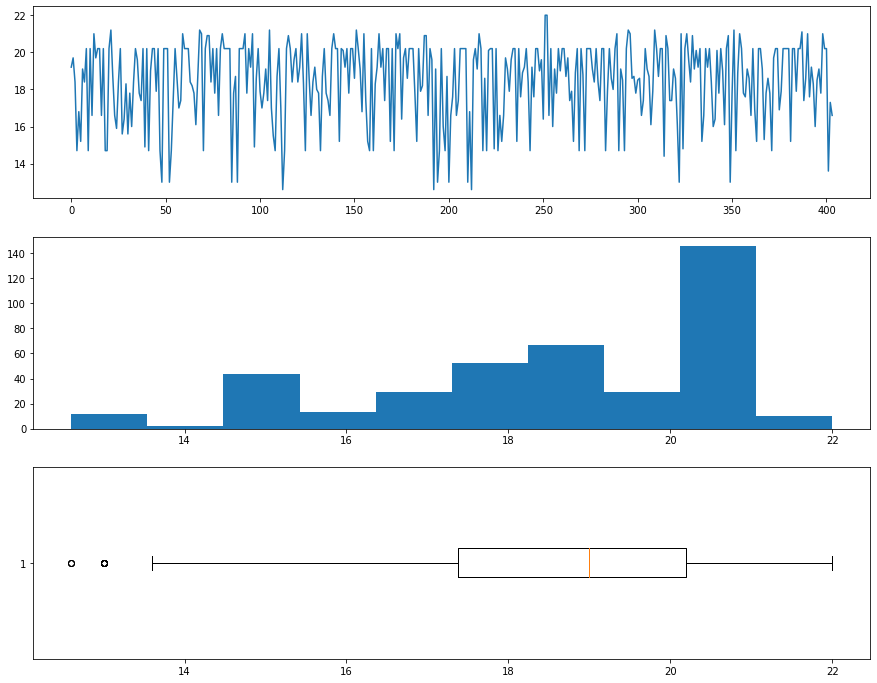

In [134]:
distribusi(data['ptratio'])

Skewnessnya adalah  1.0686080432560856
Outlier saat data diatas 36.849999999999994 dan dibawah 5.2500000000000036


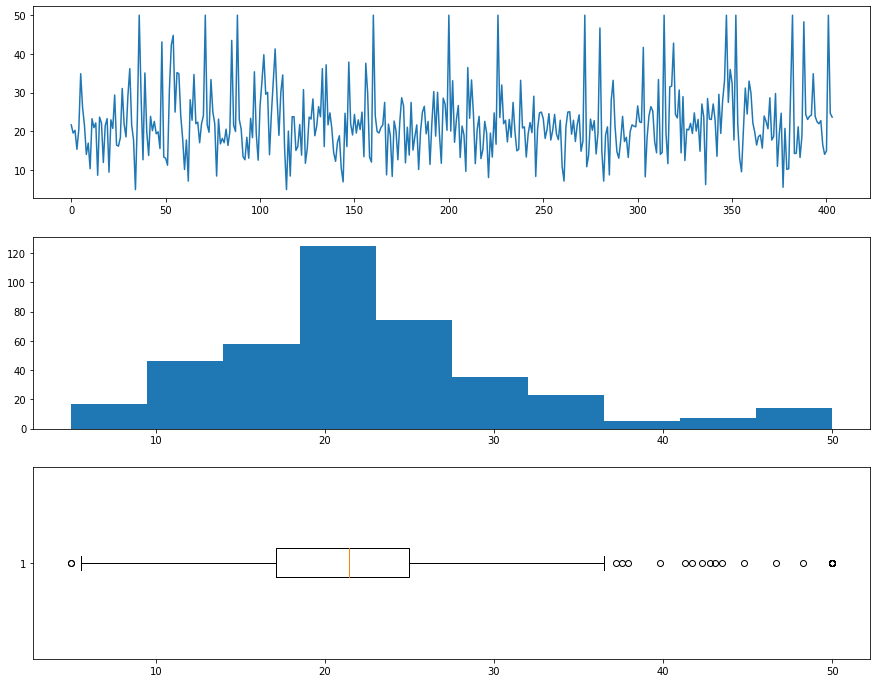

In [135]:
distribusi(data['medv'])

<Figure size 2880x2880 with 0 Axes>

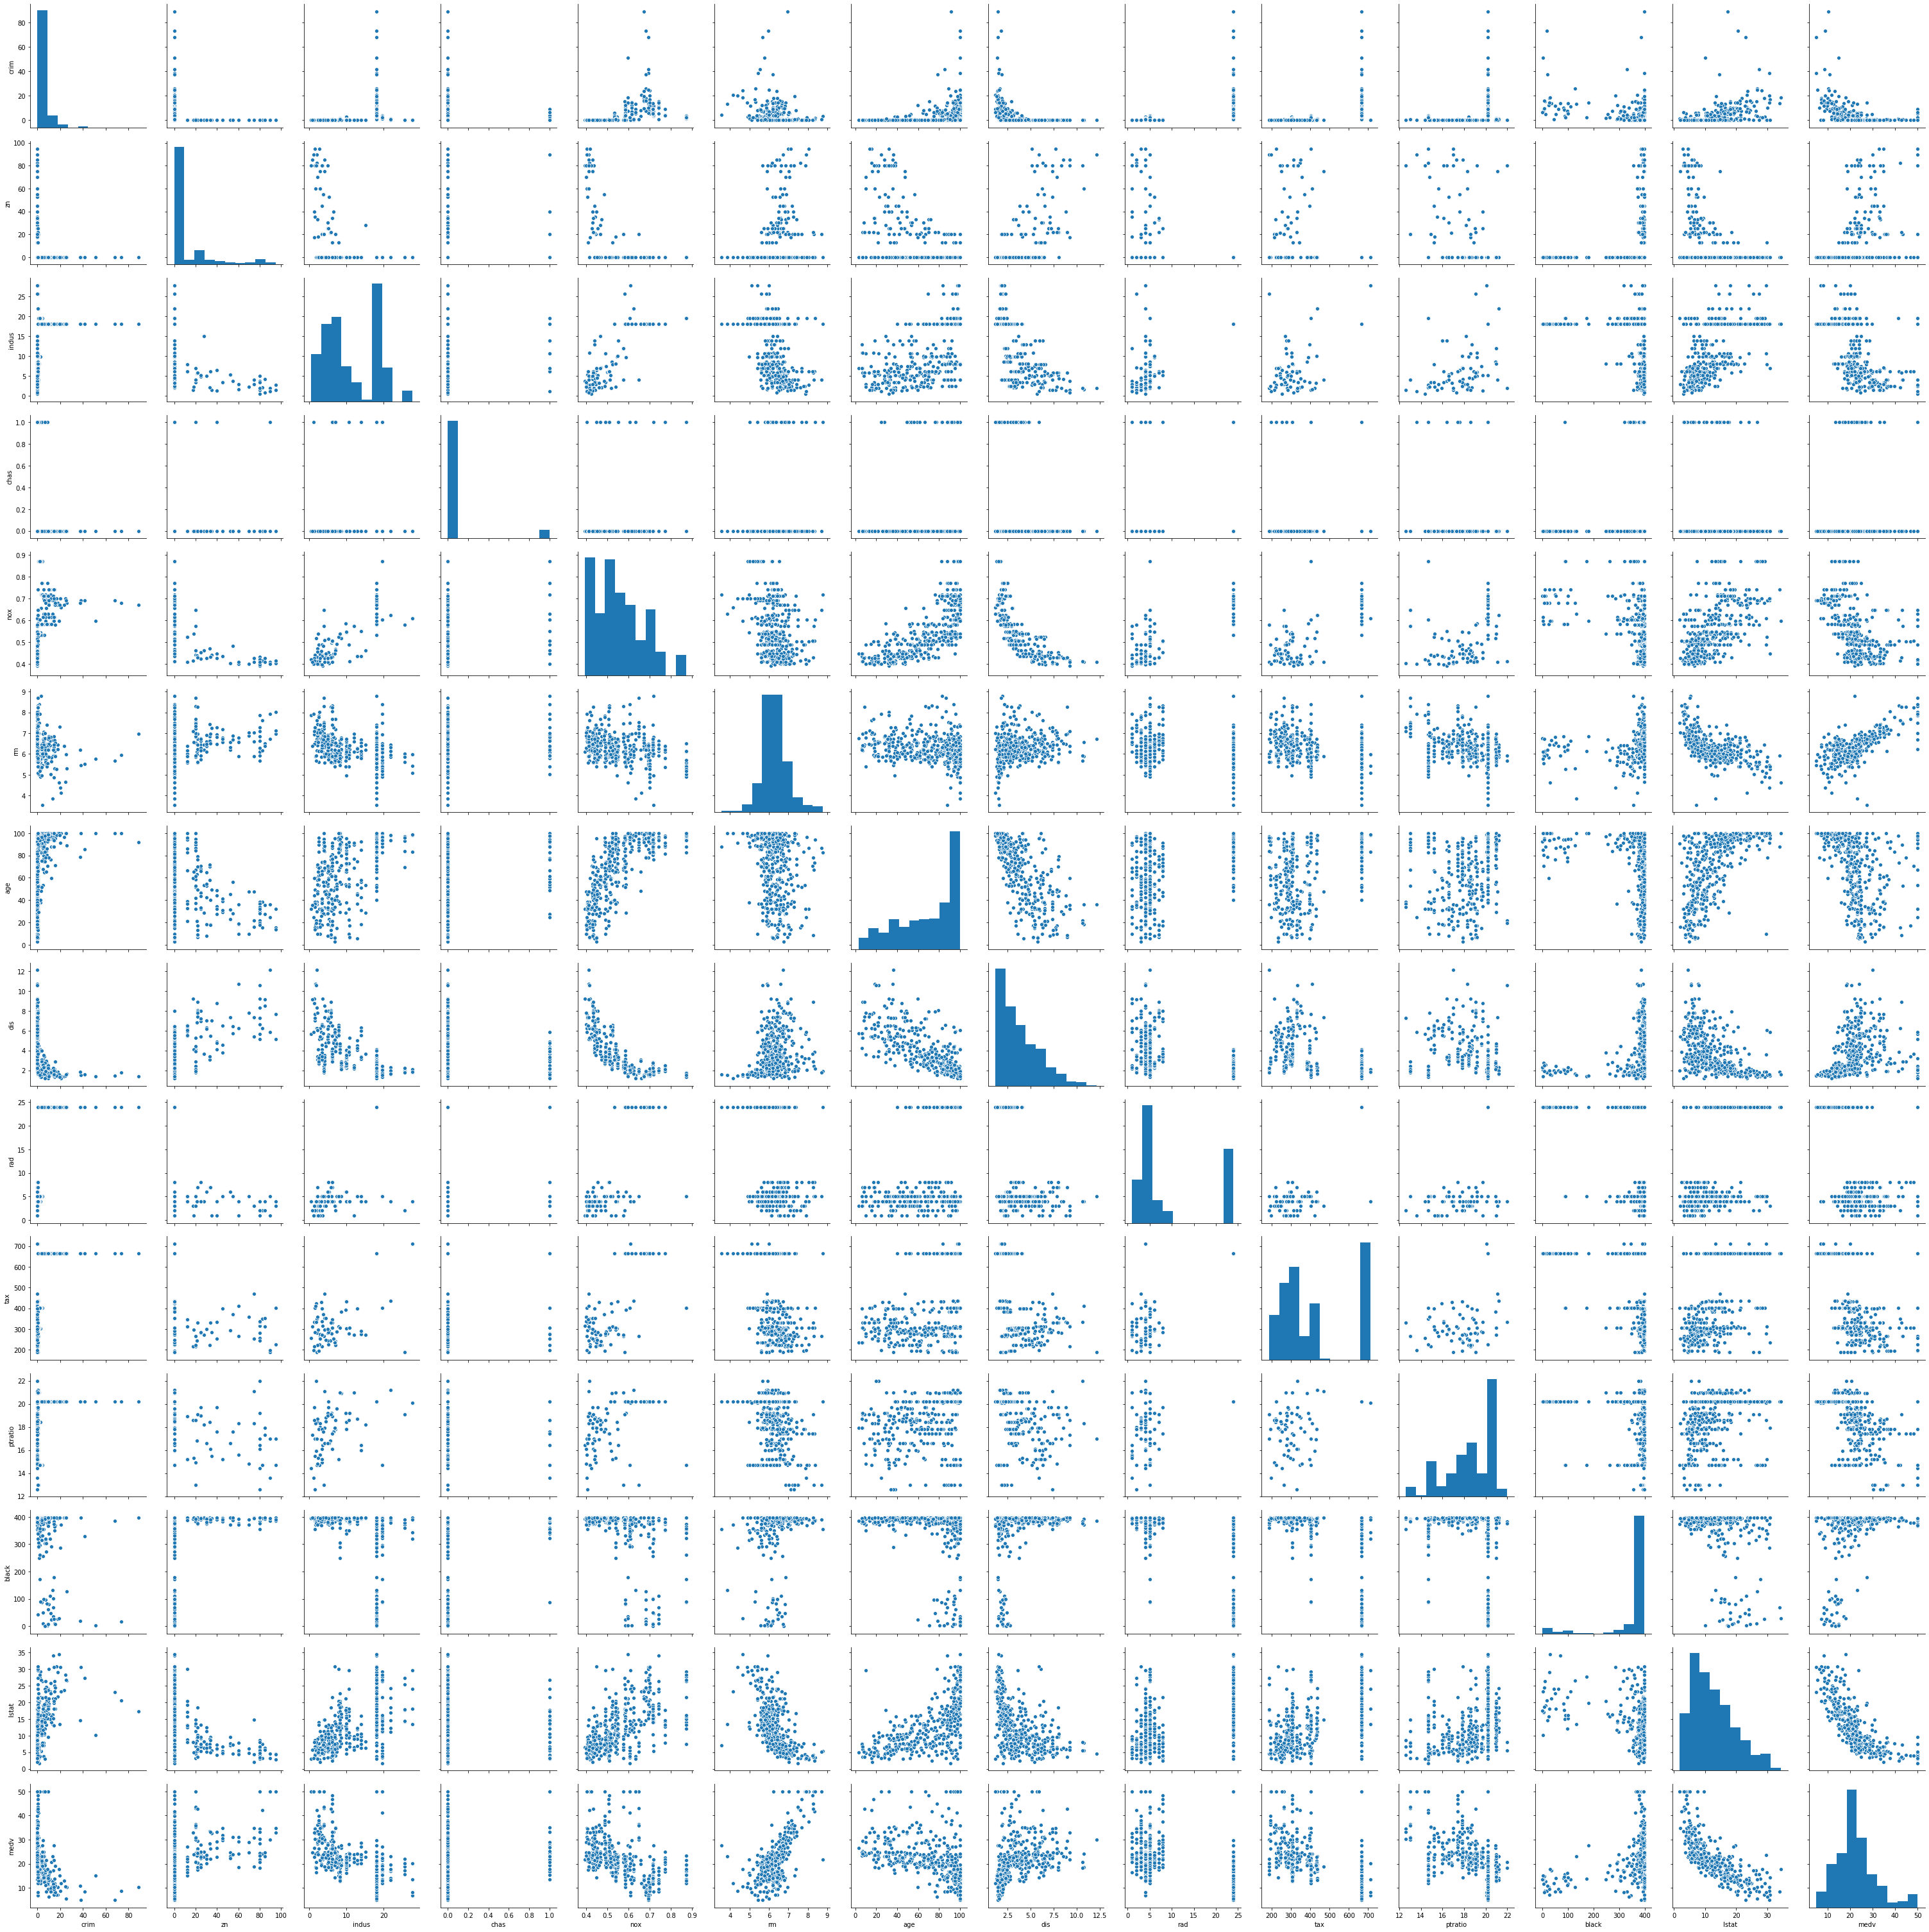

In [136]:
plt.figure(figsize=(40,40))
sns.pairplot(data,height=3)
plt.show()

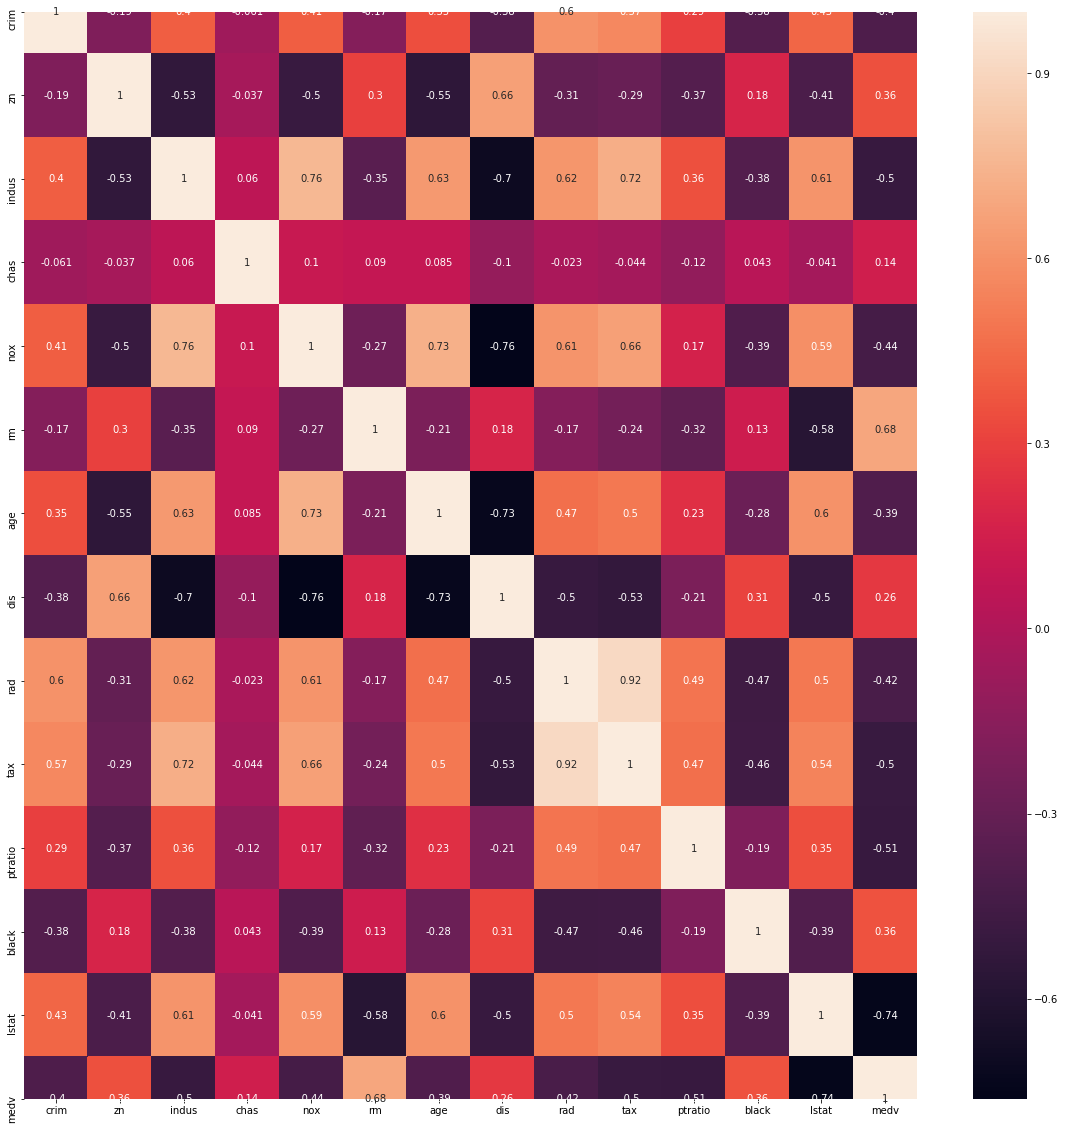

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

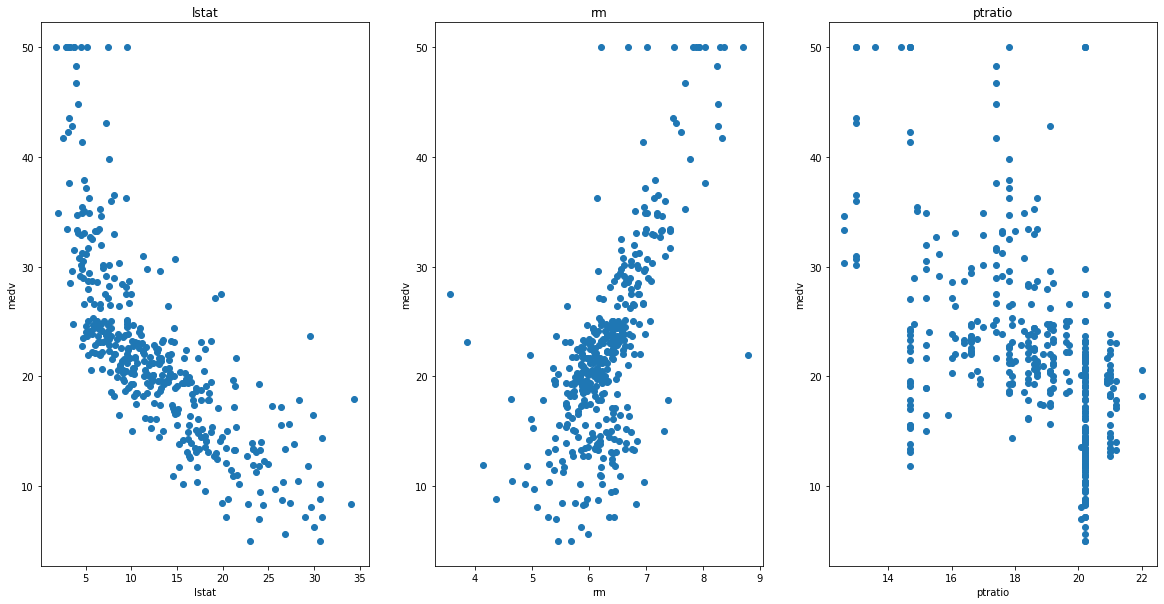

In [90]:
plt.figure(figsize=(20, 10))

independent = ['lstat', 'rm','ptratio']
dependent = data['medv']

for i, col in enumerate(independent):
    plt.subplot(1, len(independent) , i+1)
    x = data[col]
    y = dependent
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [91]:
#column pt ratio tidak memiliki pola yang bagus untuk disandingkan, maka kita hapus kolom ptratio

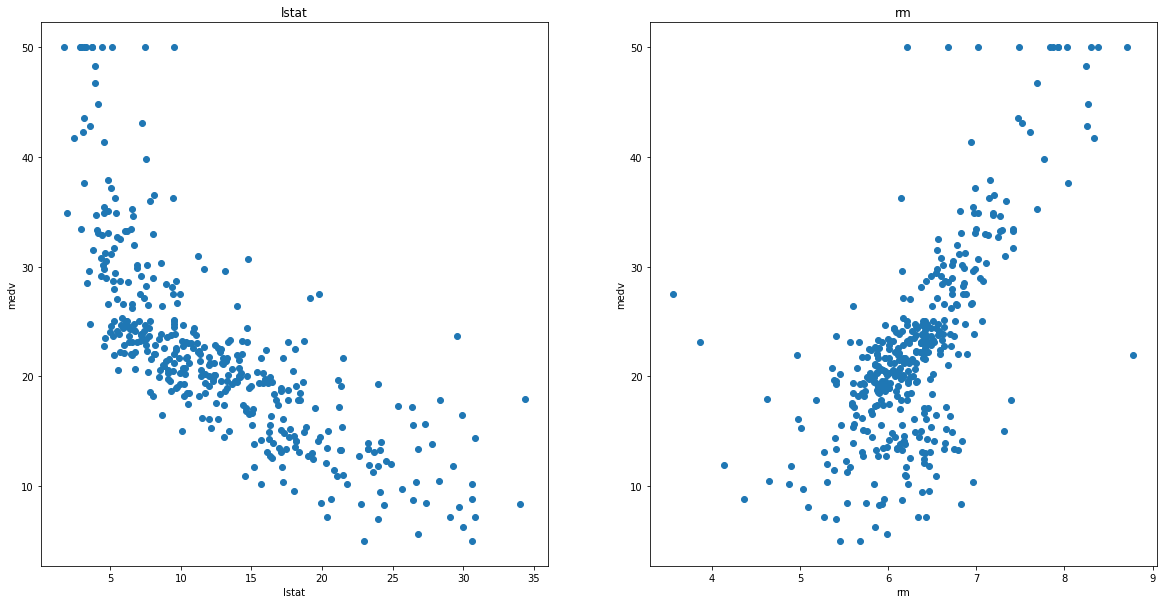

In [92]:
plt.figure(figsize=(20, 10))

independent = ['lstat', 'rm']
dependent = data['medv']

for i, col in enumerate(independent):
    plt.subplot(1, len(independent) , i+1)
    x = data[col]
    y = dependent
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

## Preprocessing

In [99]:
data2=pd.read_csv('boston_test_data.csv')

In [93]:
x=data[['rm','lstat']]
y=data['medv']

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [97]:
print(x_train.shape,y_train.shape)

(323, 2) (323,)


## Modeling

In [103]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [109]:
result = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result.head(25)

,Actual,Predicted
70,24.1,25.211582
218,15.3,15.996503
384,14.4,5.053899
33,17.8,16.372631
42,23.9,27.727698
77,8.5,14.404653
137,24.8,25.860865
331,20.1,20.181145
365,19.1,14.762564
265,19.3,20.795432


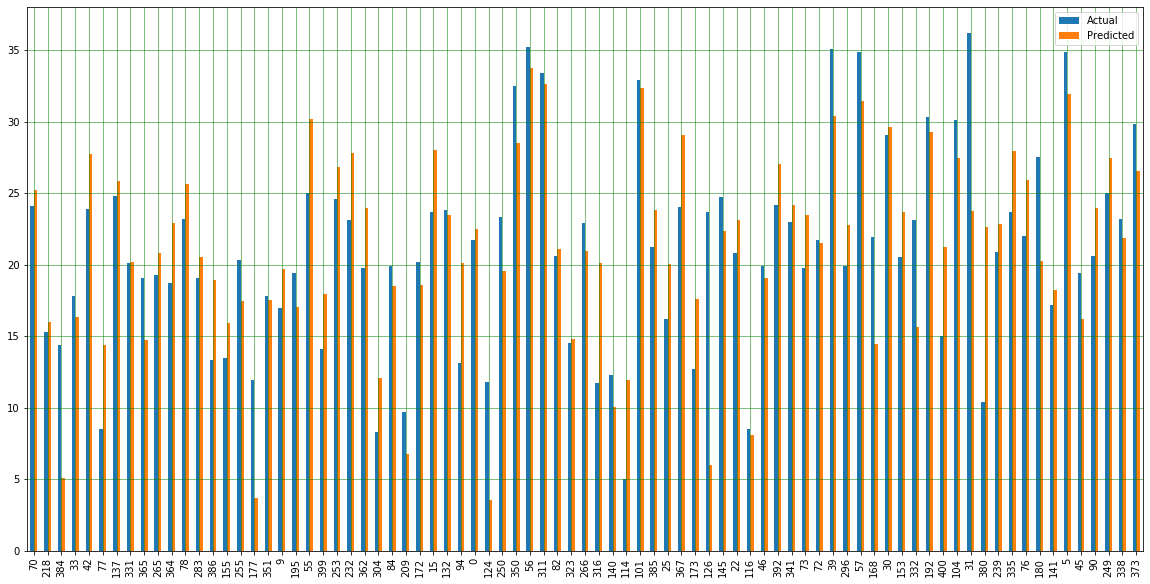

In [111]:
result.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Evaluation Model

In [107]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# model evaluation for training set
y_train_predict = model.predict(x_train)
mse=mean_squared_error(y_train, y_train_predict)
mae=mean_absolute_error(y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('MAE is {}'.format(mae))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(x_test)
mse=mean_squared_error(y_test, y_test_predict)
mae=mean_absolute_error(y_test, y_test_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('MAE is {}'.format(mae))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 3.877267361357811
RMSE is 5.362510256362484
MAE is 3.877267361357811
R2 score is 0.6616666925663394


The model performance for testing set
--------------------------------------
MSE is 3.5842500856970796
RMSE is 4.71587030696777
MAE is 3.5842500856970796
R2 score is 0.5291511036644148
